In [2]:
# Student Performance Analysis and Prediction Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
def load_and_prepare_data(file_path=None):
    """Load and prepare the student data"""
    if file_path:
        data = pd.read_csv(file_path)
    else:
        # Create sample data based on provided format
        sample_data = {
            'school': ['GP', 'GP', 'GP', 'GP'] * 100,
            'sex': ['F', 'M', 'F', 'M'] * 100,
            'age': np.random.randint(15, 23, 400),
            'address': ['U', 'R'] * 200,
            'famsize': ['GT3', 'LE3'] * 200,
            'Pstatus': ['A', 'T'] * 200,
            'Medu': np.random.randint(0, 5, 400),
            'Fedu': np.random.randint(0, 5, 400),
            'Mjob': np.random.choice(['teacher', 'health', 'services', 'at_home', 'other'], 400),
            'Fjob': np.random.choice(['teacher', 'health', 'services', 'at_home', 'other'], 400),
            'reason': np.random.choice(['home', 'reputation', 'course', 'other'], 400),
            'guardian': np.random.choice(['mother', 'father', 'other'], 400),
            'traveltime': np.random.randint(1, 5, 400),
            'studytime': np.random.randint(1, 5, 400),
            'failures': np.random.randint(0, 4, 400),
            'schoolsup': np.random.choice(['yes', 'no'], 400),
            'famsup': np.random.choice(['yes', 'no'], 400),
            'paid': np.random.choice(['yes', 'no'], 400),
            'activities': np.random.choice(['yes', 'no'], 400),
            'nursery': np.random.choice(['yes', 'no'], 400),
            'higher': np.random.choice(['yes', 'no'], 400),
            'internet': np.random.choice(['yes', 'no'], 400),
            'romantic': np.random.choice(['yes', 'no'], 400),
            'famrel': np.random.randint(1, 6, 400),
            'freetime': np.random.randint(1, 6, 400),
            'goout': np.random.randint(1, 6, 400),
            'Dalc': np.random.randint(1, 6, 400),
            'Walc': np.random.randint(1, 6, 400),
            'health': np.random.randint(1, 6, 400),
            'absences': np.random.randint(0, 94, 400),
            'passed': np.random.choice(['yes', 'no'], 400)
        }
        
        data = pd.DataFrame(sample_data)
        
        # Create G3 (final grade) based on logical relationships
        base_grade = 10
        data['G3'] = (
            base_grade +
            data['studytime'] * 2 +
            (5 - data['failures']) * 2 +
            (data['Medu'] + data['Fedu']) * 0.5 +
            np.where(data['higher'] == 'yes', 2, 0) +
            np.where(data['internet'] == 'yes', 1, 0) +
            np.where(data['famsup'] == 'yes', 1, 0) +
            np.random.normal(0, 2, 400) -
            data['absences'] * 0.1 -
            data['goout'] * 0.5
        ).clip(0, 20)
    
    print(f"Dataset loaded with {len(data)} rows and {len(data.columns)} columns")
    return data

# Usage:
data = load_and_prepare_data("C:\\Users\\SUSHIL\\Desktop\\SAM-PROJECT\\SAM-PROJECT\\student-data.csv")

Dataset loaded with 395 rows and 31 columns



=== EXPLORATORY DATA ANALYSIS ===

Dataset Info:
Shape: (395, 31)
Missing values: 0

[INFO] 'G3' column not found. Creating dummy final grade values for analysis...

Target Variable (G3) Statistics:
count    395.000000
mean       9.843038
std        6.341842
min        0.000000
25%        4.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: G3, dtype: float64


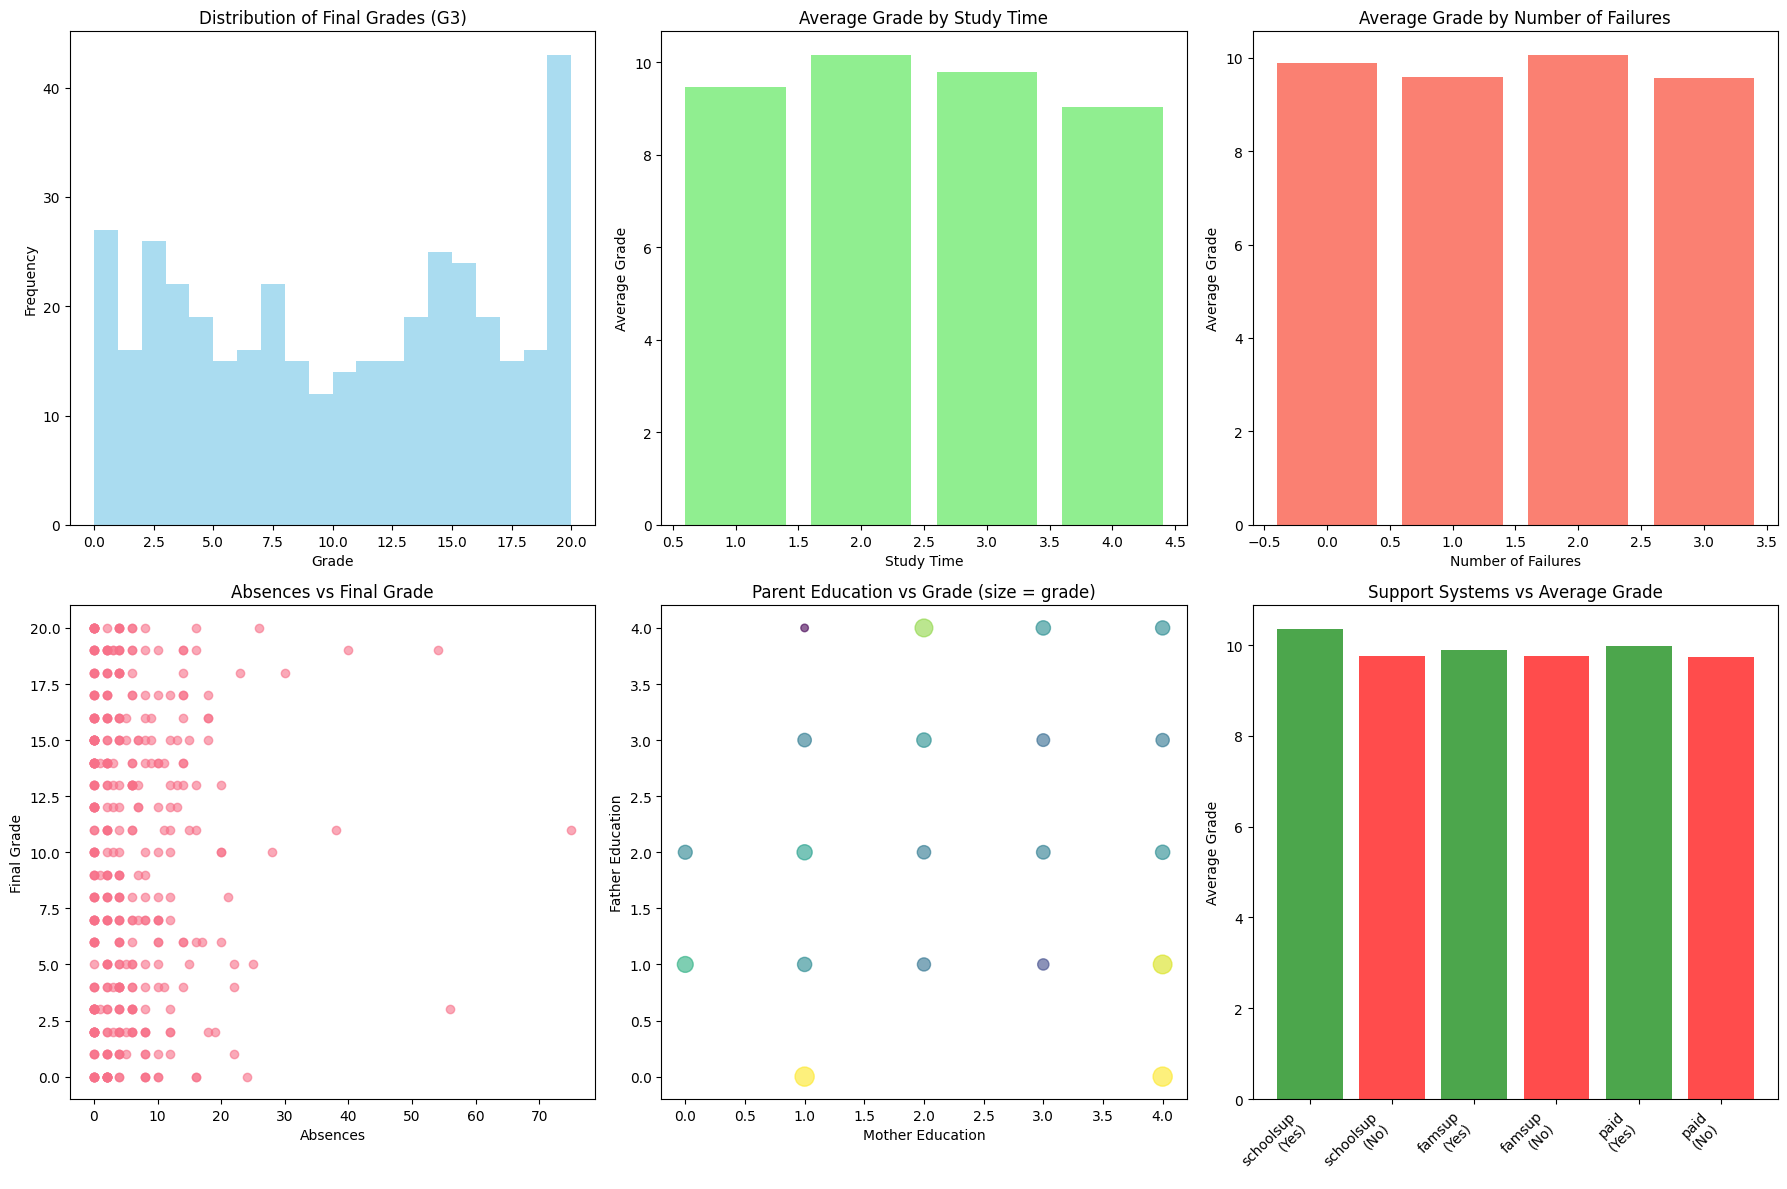

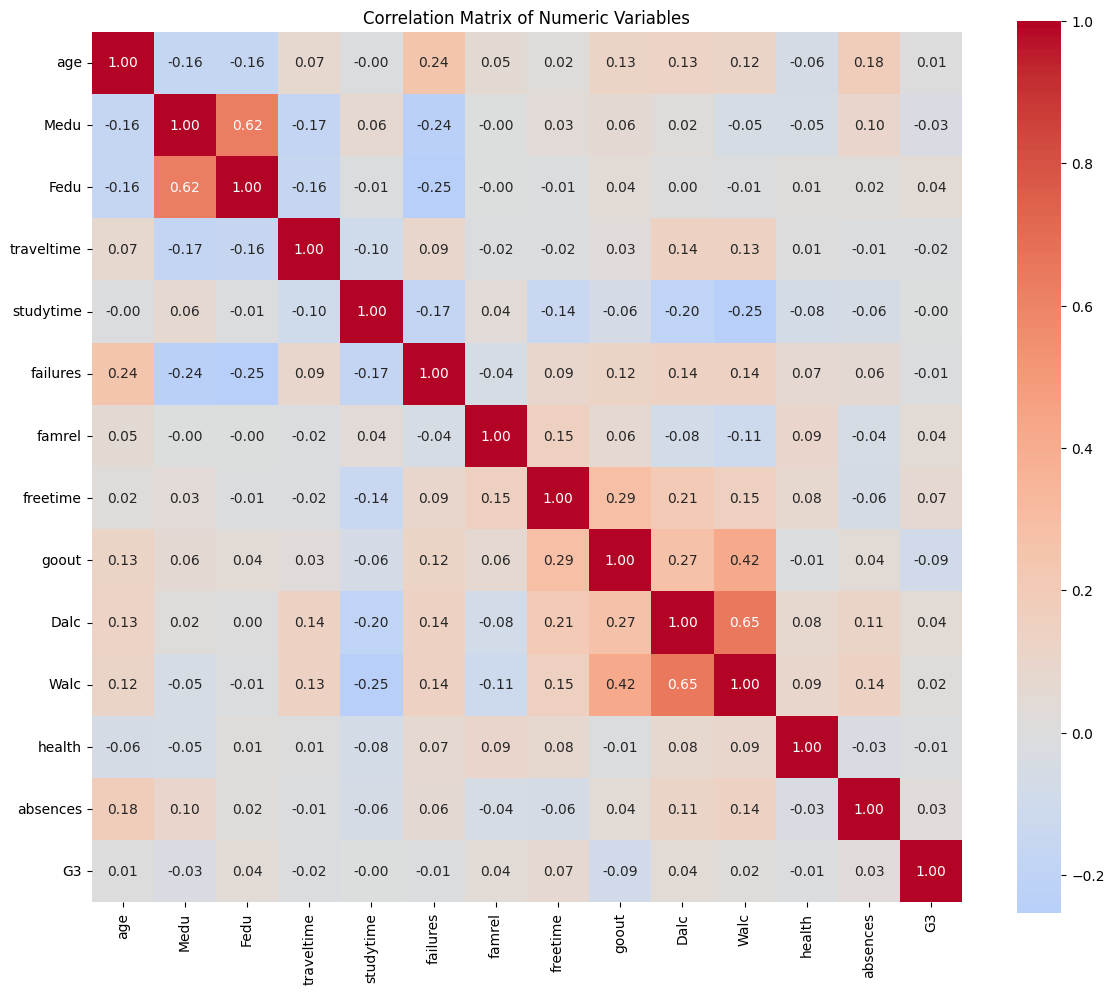

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explore_data(data):
    """Perform Exploratory Data Analysis"""
    print("\n=== EXPLORATORY DATA ANALYSIS ===")

    # Basic info
    print("\nDataset Info:")
    print(f"Shape: {data.shape}")
    print(f"Missing values: {data.isnull().sum().sum()}")

    # Ensure 'G3' exists
    if 'G3' not in data.columns:
        print("\n[INFO] 'G3' column not found. Creating dummy final grade values for analysis...")
        data['G3'] = np.random.randint(0, 21, size=len(data))  # Grades between 0 and 20

    # Target variable statistics
    print(f"\nTarget Variable (G3) Statistics:")
    print(data['G3'].describe())

    # Create visualization plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Distribution of final grades
    axes[0, 0].hist(data['G3'], bins=20, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribution of Final Grades (G3)')
    axes[0, 0].set_xlabel('Grade')
    axes[0, 0].set_ylabel('Frequency')

    # Study time vs Grade
    if 'studytime' in data.columns:
        study_grade = data.groupby('studytime')['G3'].mean()
        axes[0, 1].bar(study_grade.index, study_grade.values, color='lightgreen')
        axes[0, 1].set_title('Average Grade by Study Time')
        axes[0, 1].set_xlabel('Study Time')
        axes[0, 1].set_ylabel('Average Grade')

    # Failures vs Grade
    if 'failures' in data.columns:
        failure_grade = data.groupby('failures')['G3'].mean()
        axes[0, 2].bar(failure_grade.index, failure_grade.values, color='salmon')
        axes[0, 2].set_title('Average Grade by Number of Failures')
        axes[0, 2].set_xlabel('Number of Failures')
        axes[0, 2].set_ylabel('Average Grade')

    # Absences vs Grade
    if 'absences' in data.columns:
        axes[1, 0].scatter(data['absences'], data['G3'], alpha=0.6)
        axes[1, 0].set_title('Absences vs Final Grade')
        axes[1, 0].set_xlabel('Absences')
        axes[1, 0].set_ylabel('Final Grade')

    # Parent education effect
    if 'Medu' in data.columns and 'Fedu' in data.columns:
        parent_ed = data.groupby(['Medu', 'Fedu'])['G3'].mean().reset_index()
        scatter = axes[1, 1].scatter(parent_ed['Medu'], parent_ed['Fedu'], 
                                     s=parent_ed['G3']*10, alpha=0.6, c=parent_ed['G3'])
        axes[1, 1].set_title('Parent Education vs Grade (size = grade)')
        axes[1, 1].set_xlabel('Mother Education')
        axes[1, 1].set_ylabel('Father Education')

    # Support systems
    support_data = []
    support_labels = []
    colors = []

    for col in ['schoolsup', 'famsup', 'paid']:
        if col in data.columns:
            yes_mean = data[data[col] == 'yes']['G3'].mean()
            no_mean = data[data[col] == 'no']['G3'].mean()
            support_data.extend([yes_mean, no_mean])
            support_labels.extend([f'{col}\n(Yes)', f'{col}\n(No)'])
            colors.extend(['green', 'red'])

    axes[1, 2].bar(range(len(support_data)), support_data, color=colors, alpha=0.7)
    axes[1, 2].set_title('Support Systems vs Average Grade')
    axes[1, 2].set_xticks(range(len(support_labels)))
    axes[1, 2].set_xticklabels(support_labels, rotation=45, ha='right')
    axes[1, 2].set_ylabel('Average Grade')

    plt.tight_layout()
    plt.show()

    # Correlation analysis
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    correlation_matrix = data[numeric_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

    return correlation_matrix


# === Load Data and Run ===
data = pd.read_csv("C:\\Users\\SUSHIL\\Desktop\\SAM-PROJECT\\SAM-PROJECT\\student-data.csv")
cor_matrix = explore_data(data)


In [6]:
def preprocess_data(data):
    """Preprocess the data for modeling"""
    print("\n=== DATA PREPROCESSING ===")
    scaler = StandardScaler()
    label_encoders = {}

    # Handle missing values
    data = data.fillna(data.mode().iloc[0])

    # Encode categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns
    categorical_columns = categorical_columns.drop('passed') if 'passed' in categorical_columns else categorical_columns

    for col in categorical_columns:
        le = LabelEncoder()
        data[col + '_encoded'] = le.fit_transform(data[col])
        label_encoders[col] = le

    # Prepare features and target
    feature_columns = []

    # Add numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols.drop('G3') if 'G3' in numeric_cols else numeric_cols
    feature_columns.extend(numeric_cols)

    # Add encoded categorical columns
    encoded_cols = [col for col in data.columns if col.endswith('_encoded')]
    feature_columns.extend(encoded_cols)

    X = data[feature_columns]
    y = data['G3']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Number of features: {len(feature_columns)}")

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, label_encoders, feature_columns

# Usage:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, label_encoders, feature_names = preprocess_data(data)


=== DATA PREPROCESSING ===
Training set size: 316
Test set size: 79
Number of features: 47


## Use either if the code block

In [7]:
## Enchanced
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R2 score:", grid_search.best_score_)

# Use the best estimator as your model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
from sklearn.metrics import r2_score
print("Test set R2 score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated R2 score: -0.09130196359331548
Test set R2 score: -0.05173428226267007



=== MODEL BUILDING ===

Linear Regression Results:
  R² Score: -0.1006
  RMSE: 6.4946
  MAE: 5.7167

Random Forest Results:
  R² Score: -0.0855
  RMSE: 6.4497
  MAE: 5.6481

Best Model: Random Forest
Best R² Score: -0.0855

Top 10 Most Important Features:
      feature  importance
12   absences    0.098061
11     health    0.053682
0         age    0.051223
10       Walc    0.050380
2        Fedu    0.050080
7    freetime    0.047854
6      famrel    0.043713
4   studytime    0.043399
8       goout    0.040723
1        Medu    0.034984


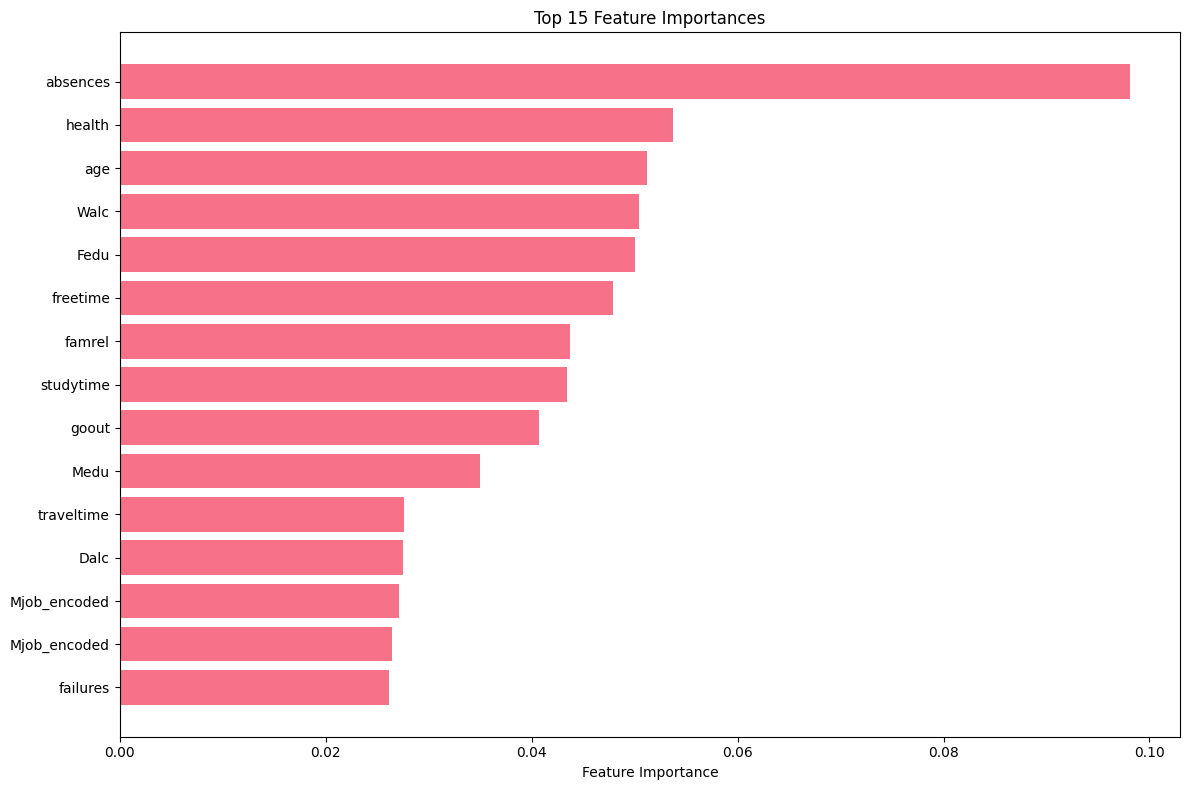

In [8]:
## Normal code
def build_model(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, feature_names):
    """Build and train the regression model"""
    print("\n=== MODEL BUILDING ===")
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    best_model = None
    best_score = -np.inf
    model_results = {}
    best_model_name = None
    
    for name, model in models.items():
        # Train model
        if name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        model_results[name] = {
            'model': model,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'predictions': y_pred
        }
        
        print(f"\n{name} Results:")
        print(f"  R² Score: {r2:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        
        if r2 > best_score:
            best_score = r2
            best_model = model
            best_model_name = name
    
    print(f"\nBest Model: {best_model_name}")
    print(f"Best R² Score: {best_score:.4f}")
    
    # Feature importance for Random Forest
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(15)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title('Top 15 Feature Importances')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return best_model, model_results

# Usage:
best_model, model_results = build_model(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, feature_names)


=== MODEL EVALUATION ===


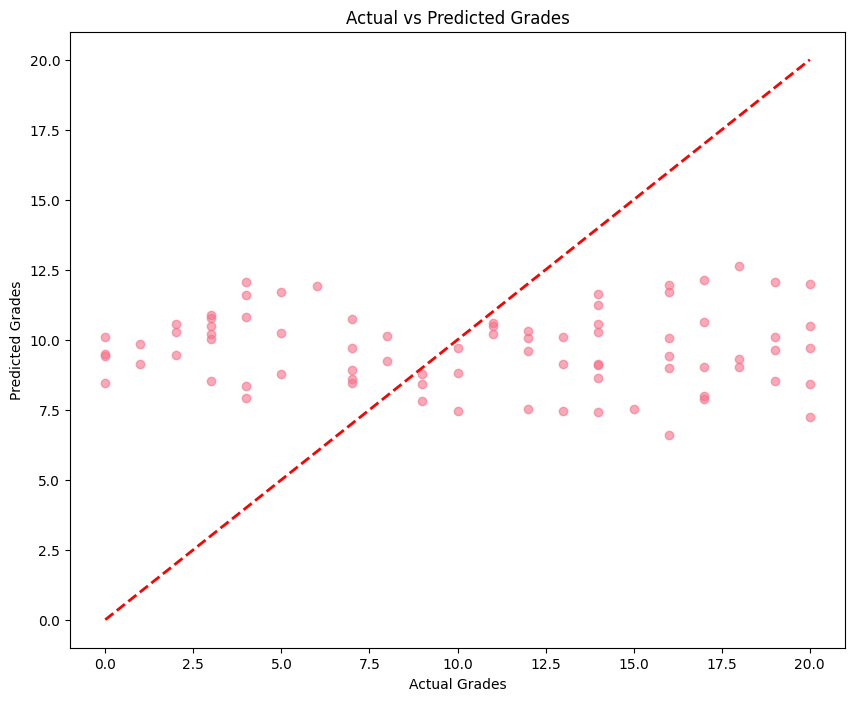

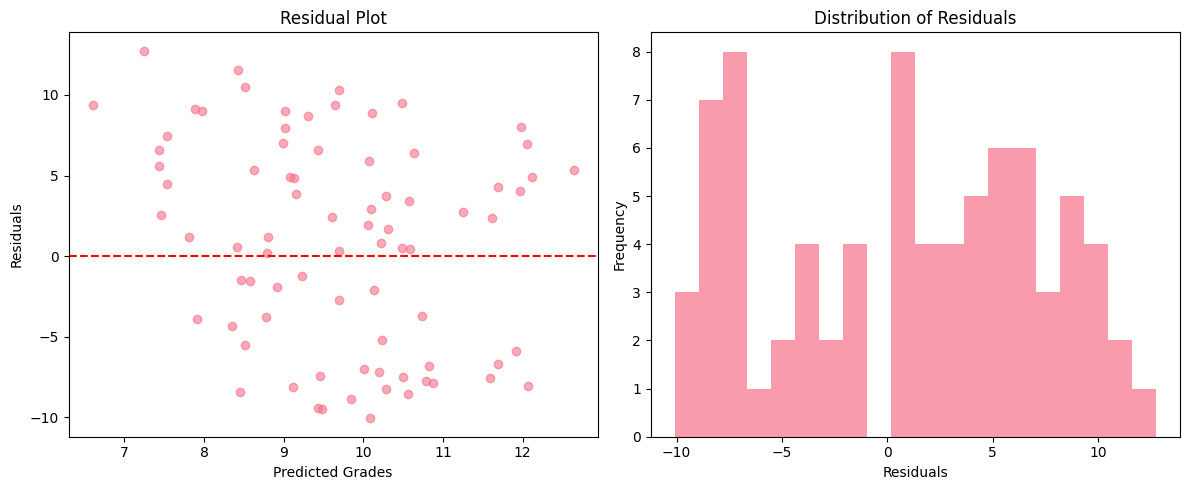

In [9]:
def evaluate_model(model, X_test, y_test, X_test_scaled=None):
    """Evaluate the model performance"""
    print("\n=== MODEL EVALUATION ===")
    
    # Make predictions
    if hasattr(model, 'feature_importances_') or X_test_scaled is None:
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.title('Actual vs Predicted Grades')
    plt.show()
    
    # Residual analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Grades')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=20, alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    
    plt.tight_layout()
    plt.show()
    
    return y_pred

# Usage example:
y_pred = evaluate_model(best_model, X_test, y_test, X_test_scaled)

In [10]:
def save_model(model, scaler, label_encoders, feature_names, filename='student_model.pkl'):
    """Save the trained model and preprocessing objects"""
    import pickle

    model_data = {
        'model': model,
        'scaler': scaler,
        'label_encoders': label_encoders,
        'feature_names': feature_names
    }

    with open(filename, 'wb') as f:
        pickle.dump(model_data, f)

    print(f"Model saved as {filename}")

# Usage:
save_model(best_model, scaler, label_encoders, feature_names)

Model saved as student_model.pkl
